![logo.png](https://github.com/interviewquery/takehomes/blob/amazon_1/amazon_1/logo.png?raw=1)

# Overview

You are selling certain items at your store. Every once in a while you may experience shortage. In which case, you notify your customers when your inventory will be replenished. You want to know which percent of your customers are not waiting for the replenishment and buying the item elsewhere - lost sales due to shortage. (Note that some do wait for your replenishment which is expressed as a higher demand at the day of replenishment).

![](https://cdn.mathpix.com/cropped/2022_09_14_28e45c346ad5b3be11fag-1.jpg?height=681&width=1632&top_left_y=527&top_left_x=252)

**How would you find that out?**

Simplifying assumptions:

1. The demand has no trend and no seasonality.

2. We may assume demand to follow the function $d_{t}=d_{t-1}+\varepsilon_{t}$, where $\varepsilon_{t}$ is the noise such that $\varepsilon_{t} \sim \mathcal{N}\left(0, \sigma^{2}\right)$. That is, the noise is symmetric and unbiased.

3. Customers experiencing shortage that decide to come back, would only come back on the day of replenishment.

4. Replenishment occurs in the beginning of days only.

5. Each customer buys no more than 1 item

In [1]:
!git clone --branch amazon_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/amazon_1
!ls
!if [[ $(ls *.zip) ]]; then unzip *.zip; fi

fatal: destination path 'takehomes' already exists and is not an empty directory.
/content/takehomes/amazon_1
data.csv  logo.png  takehomefile.ipynb	takehomes
ls: cannot access '*.zip': No such file or directory


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
data = pd.read_csv('data.csv')
data.head(60)


,date,inventory,sales
0,7/1/20,189,31
1,7/2/20,159,30
2,7/3/20,127,32
3,7/4/20,101,26
4,7/5/20,74,27
5,7/6/20,28,46
6,7/7/20,0,28
7,7/8/20,0,0
8,7/9/20,963,37
9,7/10/20,942,21


In [23]:
data.shape

(374, 3)

In [24]:
data.describe()


,inventory,sales
count,374.000000,374.000000
mean,453.839572,34.700535
std,290.941452,11.463950
min,0.000000,0.000000
25%,196.500000,27.000000
50%,450.500000,35.000000
75%,706.500000,42.000000
max,963.000000,79.000000


In [4]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       374 non-null    object
 1   inventory  374 non-null    int64 
 2   sales      374 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.9+ KB


In [5]:
min(data.date), max(data.date)



('1/1/21', '9/9/20')

<ipython-input-6-d7c30dd015dd>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data.date[:100], rotation=90)
<ipython-input-6-d7c30dd015dd>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(data.date[:100], rotation=90)


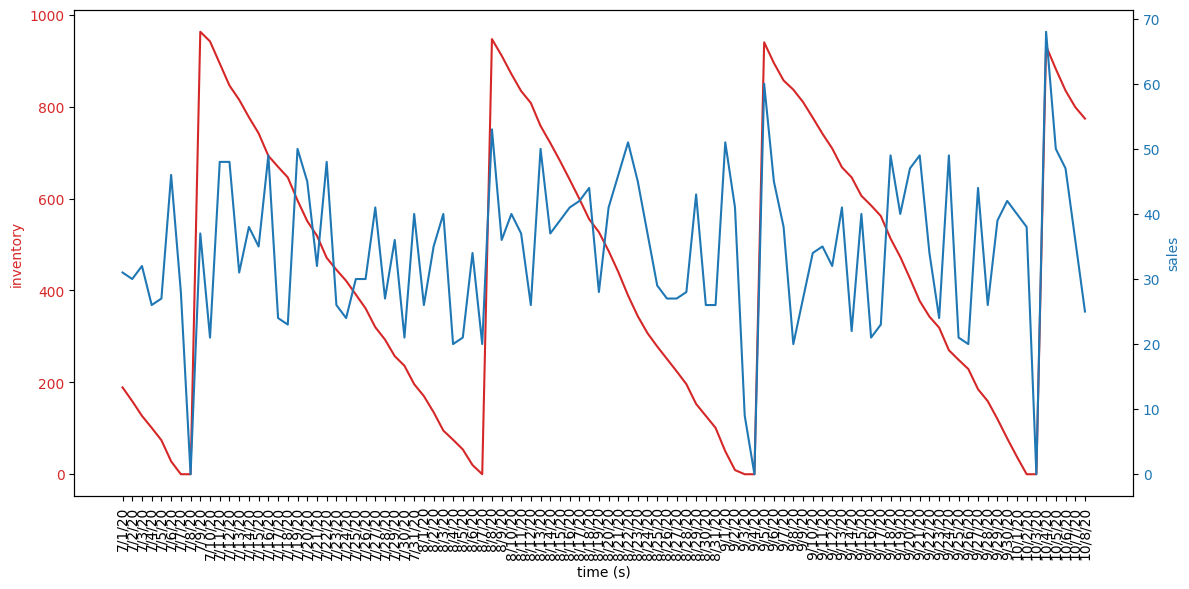

In [6]:
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('inventory', color=color)
ax1.plot(data.date[:100], data.inventory[:100], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(data.date[:100], rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sales', color=color)  # we already handled the x-label with ax1
ax2.plot(data.date[:100], data.sales[:100], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticklabels(data.date[:100], rotation=90)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# create prediction using rolling window

In [25]:
data['evarage_win_3'] = data.sales.rolling( 3,center=False,min_periods=1).mean()

In [26]:
data['evarage_win_3_center'] = data.sales.rolling( 3,center=True,min_periods=1).mean()

In [27]:
shortage = data[data.inventory == 0]

In [72]:
shortage

,date,inventory,sales,evarage_win_3,evarage_win_3_center
6,7/7/20,0,28,33.666667,24.666667
7,7/8/20,0,0,24.666667,21.666667
37,8/7/20,0,20,25.000000,35.666667
64,9/3/20,0,9,33.666667,16.666667
65,9/4/20,0,0,16.666667,23.000000
93,10/2/20,0,38,40.000000,26.000000
94,10/3/20,0,0,26.000000,35.333333
123,11/1/20,0,7,25.000000,34.666667
150,11/28/20,0,12,30.000000,19.000000
151,11/29/20,0,0,19.000000,30.333333


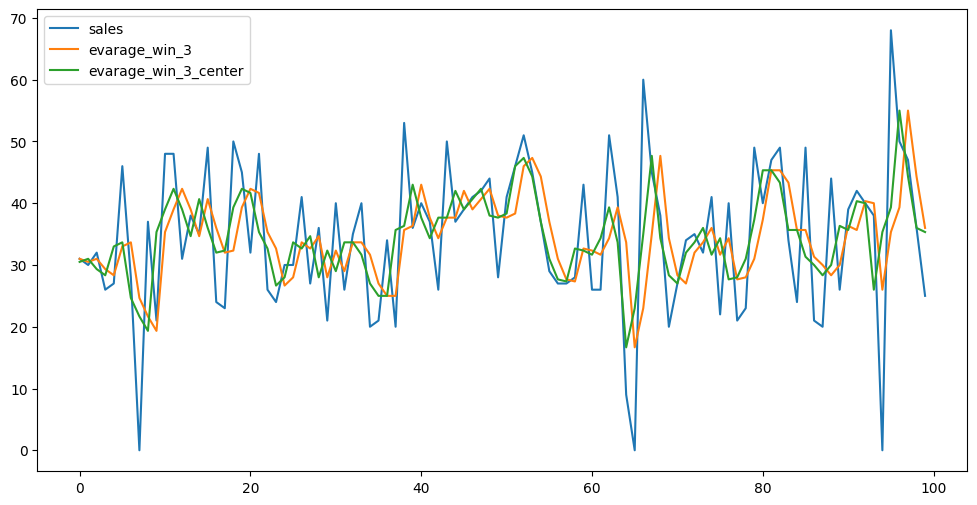

In [107]:
plt.figure(figsize=(12,6))
plt.plot(data.sales[:100])
plt.plot(data.evarage_win_3[:100])
plt.plot(data.evarage_win_3_center[:100])
plt.legend(['sales','evarage_win_3','evarage_win_3_center'])
plt.show()

In [92]:
data['lost'] = data.evarage_win_3_center - data.sales


In [109]:
wating_count= 0
it_first = False

losses = []
for _, day in data.iterrows():
  if day.inventory == 0:
    wating_count += day.lost
    it_first = True
  else:
    if it_first:
      it_first = False
      if day.lost < 0:
        l = (wating_count + day.lost)
        if l >0 and wating_count != 0:
          losses.append(l/wating_count)
      else :
        losses.append(1)
      wating_count = 0


In [104]:
len(losses)

5

In [110]:
losses


[0.036363636363636424,
 0.18478260869565222,
 0.517241379310345,
 0.1382978723404256,
 0.13432835820895522]

In [111]:
np.mean(losses)*100

20.220277098380286